Sales_data

In [ ]:
#importing requred libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Sales Data.csv")

In [ ]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
df.shape

(185950, 11)

In [ ]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [ ]:
#As we an see there is no null values in the given dataset
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [ ]:
#we have drop the column 'Unnamed: 0' because as such its not required
df = df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
#lets analyse sales trend over time

In [ ]:

# Group the data by 'Months' and sum the 'Sales' for each month
monthly_sales = df.groupby('Month')['Sales'].sum()


In [ ]:
#Grouping the data by months and then calculating the total sales for each month helps you understand the overall sales pattern throughout the year.
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

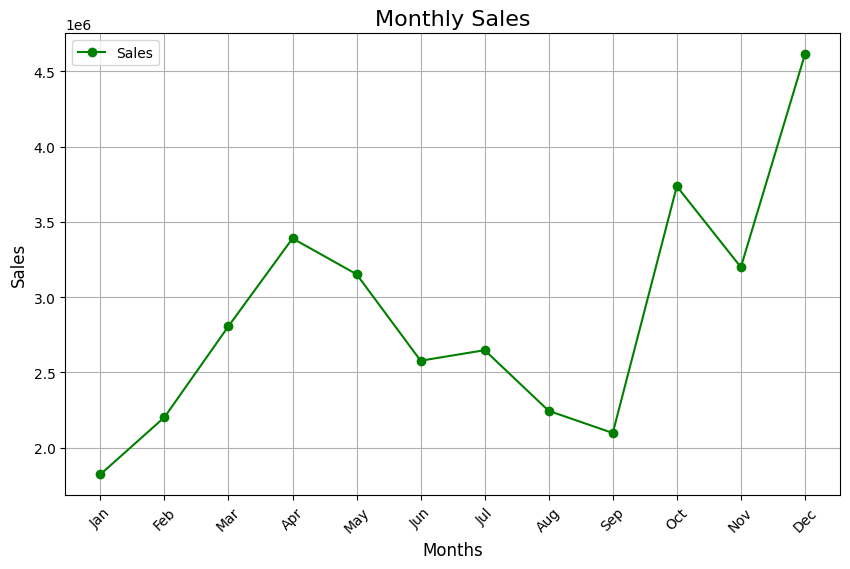

In [ ]:
# Create a line chart using the months
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='g', label='Sales')  # Plotting the line chart
plt.title('Monthly Sales', fontsize=16)  # Set the title for the plot
plt.xlabel('Months', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Sales', fontsize=12)  # Set the label for the y-axis
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)  # Set the x-axis ticks to show month names
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()


OBZERVATION: we can see that december has recorded the
highest sales followed by October than April,January has recorded the lowest sales follwed by september



now we are going to identify best selling products:

In [ ]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
df['Quantity Ordered'].unique()

array([1, 2, 4, 3, 7, 5, 6, 8, 9])

In [ ]:
# Group the data by 'Product' and sum the 'Quantity Ordered' for each product
best_selling_products = df.groupby('Product')['Quantity Ordered'].sum()

# Sort the products by the quantity ordered to identify the best-selling products
best_selling_products = best_selling_products.sort_values(ascending=False)

In [ ]:
best_selling_products

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

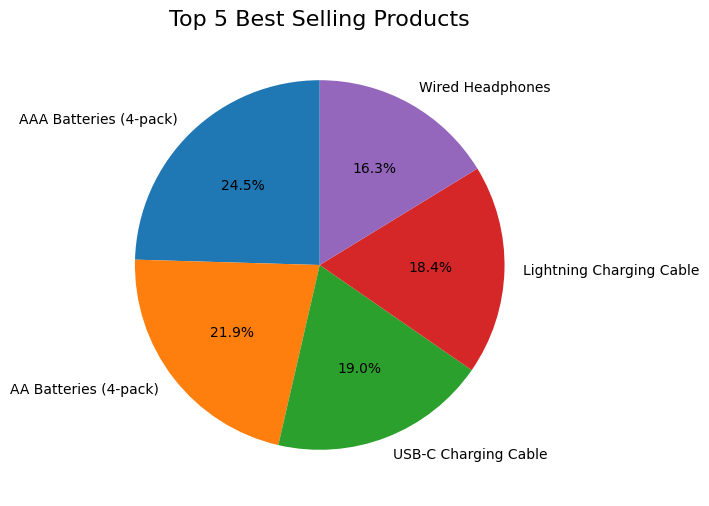

In [ ]:
# Plotting a pie chart for the best-selling products
plt.figure(figsize=(8, 6))  # Set the figure size
best_selling_products.head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Best Selling Products', fontsize=16)  # Set the title for the plot
plt.ylabel('')  # Remove the y-axis label
plt.show()

OBZERVATION: "AAA Batteries(4-pack)" are the best selling product with significant share of 24.5% of total sales followed by "AA Batteries (4-pack)" with 21.9%,

now we will find out what ime in a day our sales is maximized:


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
df['Hour'].unique()

array([ 0,  7, 18, 15, 12, 22,  9, 23, 11, 13, 17, 19, 14, 16,  1,  6, 10,
       20, 21,  8,  3,  5,  2,  4])

In [ ]:
# Group the data by 'Hour' and sum the 'Sales' for each month
Hourly_sales = df.groupby('Hour')['Sales'].sum()


In [ ]:
Hourly_sales

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

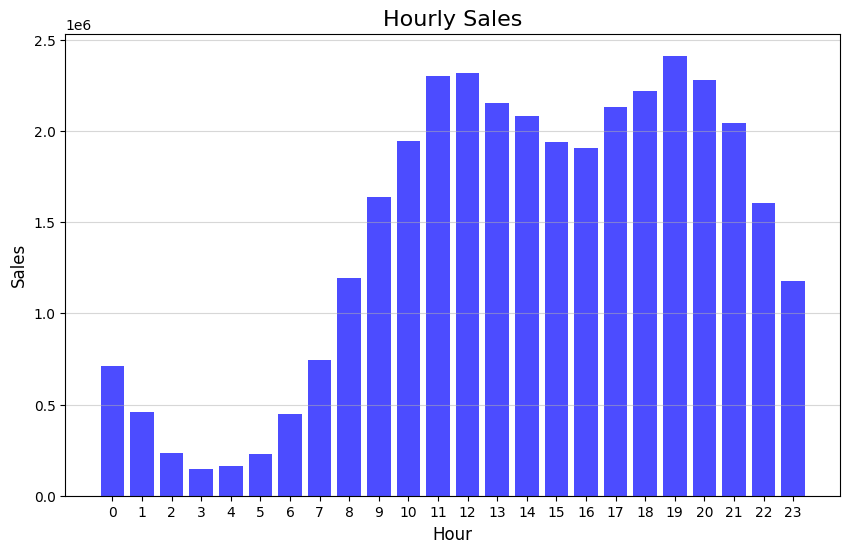

In [ ]:
# Plotting a bar plot for the hourly sales
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(Hourly_sales.index, Hourly_sales.values, color='b', alpha=0.7)  # Plotting the bar plot
plt.title('Hourly Sales', fontsize=16)  # Set the title for the plot
plt.xlabel('Hour', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Sales', fontsize=12)  # Set the label for the y-axis
plt.xticks(range(0, 24))  # Set the x-axis ticks to show the hours
plt.grid(axis='y', alpha=0.5)  # Show grid
plt.show()


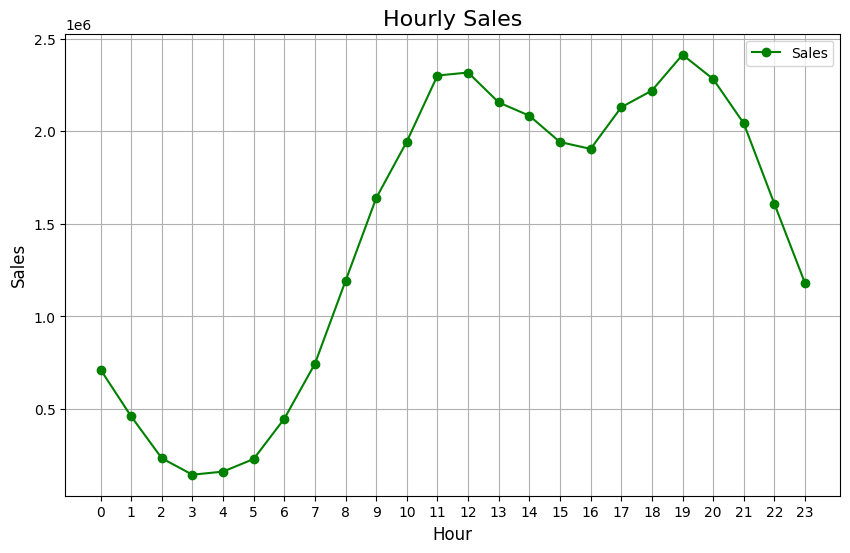

In [ ]:
# Plotting a line chart for the hourly sales
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(Hourly_sales.index, Hourly_sales.values, marker='o', linestyle='-', color='g', label='Sales')  # Plotting the line chart
plt.title('Hourly Sales', fontsize=16)  # Set the title for the plot
plt.xlabel('Hour', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Sales', fontsize=12)  # Set the label for the y-axis
plt.xticks(range(0, 24))  # Set the x-axis ticks to show the hours
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()

OBZERVATION: as we can see from 1 am to 7 am the sales is low because the customers might be sleeping but after 7 the sales is increasing exponentially, Peak Hours of sales were bettween 11 Am and 8 PM

In [ ]:
df['Purchase Address'].unique()

array(['136 Church St, New York City, NY 10001',
       '562 2nd St, New York City, NY 10001',
       '277 Main St, New York City, NY 10001', ...,
       '590 Wilson St, Los Angeles, CA 90001',
       '685 Hickory St, New York City, NY 10001',
       '209 11th St, Atlanta, GA 30301'], dtype=object)

In [ ]:
# Group the data by 'Purchase Address' and sum the 'Sales' for each month
Location_by_sales = df.groupby('Purchase Address')['Sales'].sum()

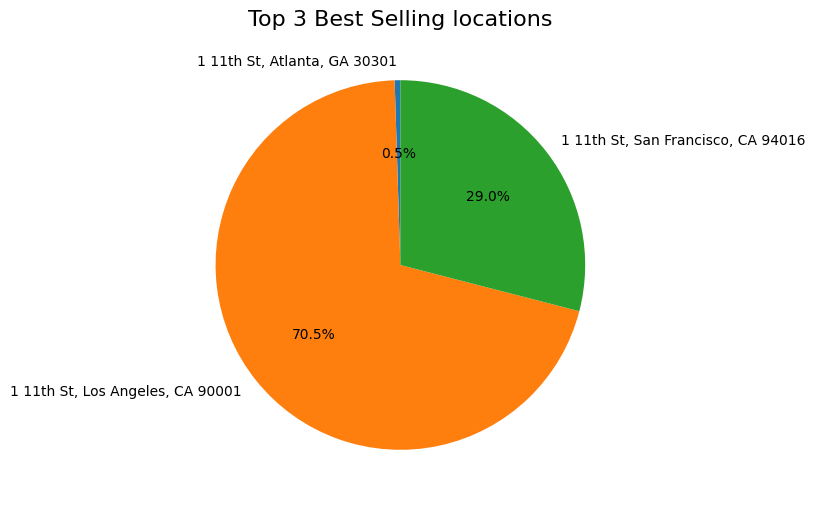

In [ ]:
# Plotting a pie chart for the top 3 selling locations
plt.figure(figsize=(8, 6))  # Set the figure size
Location_by_sales.head(3).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 3 Best Selling locations', fontsize=16)  # Set the title for the plot
plt.ylabel('')  # Remove the y-axis label
plt.show()

OBZERVATION: Top location in terms of sales are "11th st, Los Angeles,CA 90001"